In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset using sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#Separating data into feature variable X and target variable y respectively
X=data['data']
y=data['target']

#Extracting the names of the features from data
features = data['feature_names']

#Splitting X & y into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=50)

from sklearn.svm import SVC
clf = SVC(probability=True).fit(X_train, y_train)

#Checking the model's performance on the test set
print('R2 score for the model on test set =', clf.score(X_test, y_test))

R2 score for the model on test set = 0.9824561403508771


In [2]:
#Importing the module for LimeTabularExplainer
import lime.lime_tabular

#Instantiating the explainer object by passing in the training set, and the extracted features
explainer_gp_ard = lime.lime_tabular.LimeTabularExplainer(X_train,
                    feature_names=features, 
                    verbose=True, mode='classification',feature_selection='gp_ard')

#Instantiating the explainer object by passing in the training set, and the extracted features
explainer_gp_KL = lime.lime_tabular.LimeTabularExplainer(X_train,
                    feature_names=features, 
                    verbose=True, mode='classification',feature_selection='gp_KL')

#Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train,
                    feature_names=features, 
                    verbose=True, mode='classification',feature_selection='lasso_path')

#Index corresponding to the test vector
i = 10

#Number denoting the top features; For the purposes of this experiment we've taken into account all features
k = X_train.shape[1]

num_samples_list = [50, 100, 200, 250, 300, 350, 400, 450, 500]

dict_lime={}
dict_gp_ard={}
dict_gp_KL = {}

In [3]:
for val in num_samples_list:
    temp_dict = {}
    for iteration in range(100):
        print(f"Performing experiment for LIME(default settings) num_samples = {val}, iteration = {iteration}")

        exp_lime = explainer_lime.explain_instance(X_test[i], clf.predict_proba, num_features=k, num_samples=val)

        for feature in exp_lime.as_list():
            if feature[0] in temp_dict.keys():
                temp_dict[feature[0]].append(feature[1])
            else:
                temp_dict[feature[0]] = [feature[1]]
    
    dict_lime[val] = temp_dict
    
    temp_dict = {}
    for iteration in range(100):
        print(f"-->> Performing experiment for LIME(gp_ard) num_samples = {val}, iteration = {iteration}")
        exp_gp_ard = explainer_gp_ard.explain_instance(X_test[i], clf.predict_proba, num_features=k, num_samples=val)

        for feature in exp_gp_ard.as_list():
            if feature[0] in temp_dict.keys():
                temp_dict[feature[0]].append(feature[1])
            else:
                temp_dict[feature[0]] = [feature[1]]
    
    dict_gp_ard[val] = temp_dict
    
    temp_dict = {}
    for iteration in range(100):
        print(f"-->> Performing experiment for LIME(gp_KL) num_samples = {val}, iteration = {iteration}")
        exp_gp_KL = explainer_gp_KL.explain_instance(X_test[i], clf.predict_proba, num_features=k, num_samples=val)

        for feature in exp_gp_KL.as_list():
            if feature[0] in temp_dict.keys():
                temp_dict[feature[0]].append(feature[1])
            else:
                temp_dict[feature[0]] = [feature[1]]
    
    dict_gp_KL[val] = temp_dict

Performing experiment for LIME(default settings) num_samples = 50, iteration = 0
Intercept 0.3666893347694107
Prediction_local [1.04076301]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 1
Intercept 0.5175732616932767
Prediction_local [0.86862066]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 2
Intercept 0.5501577562605642
Prediction_local [0.76648989]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 3
Intercept 0.44084491629362194
Prediction_local [1.02857134]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 4
Intercept 0.5713029064671704
Prediction_local [0.87353596]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 5
Intercept 0.4067373447901726
Prediction_local [1.02794128]
Right: 0.9726423061200601
Per

Intercept 0.5204432126950296
Prediction_local [1.01064395]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 50
Intercept 0.3518343549758612
Prediction_local [0.92511708]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 51
Intercept 0.5058013225637205
Prediction_local [0.8824791]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 52
Intercept 0.5085476101481892
Prediction_local [1.0264575]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 53
Intercept 0.5618494938708501
Prediction_local [0.94182346]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 54
Intercept 0.4251321299110248
Prediction_local [0.97441542]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 50, iteration = 55


Intercept 0.345313326591159
Prediction_local [0.99009376]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 1


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.513226210140175
Prediction_local [0.96832335]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 2
Intercept 0.3890822264404825
Prediction_local [0.96968351]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 3
Intercept 0.3213854561922586
Prediction_local [1.00070907]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 4


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.43209769522934466
Prediction_local [0.83312762]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 5
Intercept 0.5015506062428121
Prediction_local [1.00308236]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 6
Intercept 0.5194069572456408
Prediction_local [0.79357229]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 7
Intercept 0.2714916770726605
Prediction_local [1.08068117]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 8
Intercept 0.5404977977957182
Prediction_local [1.00753183]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 9
Intercept 0.4402235113543279
Prediction_local [0.98388572]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 10
Intercept 0.43876043724633795
Pr

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.4490347068477677
Prediction_local [0.87027879]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 17
Intercept 0.5595298151486896
Prediction_local [0.978192]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 18
Intercept 0.399378947226547
Prediction_local [1.04540094]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 19
Intercept 0.364150320792882
Prediction_local [1.08205274]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 20
Intercept 0.4404097990213276
Prediction_local [0.94295238]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 21
Intercept 0.44039516091670067
Prediction_local [0.78237773]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 22
Intercept 0.4463893681812933
Pr

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5129726567537626
Prediction_local [1.06937098]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 31
Intercept 0.49600913808317426
Prediction_local [0.99036443]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 32
Intercept 0.32853164335114826
Prediction_local [0.96873916]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 33
Intercept 0.6115396945459114
Prediction_local [0.89430775]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 34
Intercept 0.4746645475006326
Prediction_local [0.99696351]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 35
Intercept 0.3810698579166766
Prediction_local [1.12540931]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 36
Intercept 0.43889964626882

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.599414123751408
Prediction_local [0.89131831]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 57
Intercept 0.34678900651649874
Prediction_local [1.0001371]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 58
Intercept 0.4447416739819966
Prediction_local [0.85699853]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 59
Intercept 0.4286002357434879
Prediction_local [0.98901027]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 60
Intercept 0.5585487126563019
Prediction_local [0.92924525]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 61
Intercept 0.4432977432320345
Prediction_local [0.95148444]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 62
Intercept 0.4254585473212422


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.5282959607830682
Prediction_local [0.78134782]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 64
Intercept 0.6129520096713004
Prediction_local [0.87599041]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 65
Intercept 0.5963353744934613
Prediction_local [0.88524249]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 66
Intercept 0.5143237676431053
Prediction_local [0.89689175]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 67
Intercept 0.400563067009417
Prediction_local [1.02007162]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 68
Intercept 0.5675902886124191
Prediction_local [0.90599672]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 69
Intercept 0.36181906258562396

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.38469967330680904
Prediction_local [1.02033304]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 88
Intercept 0.3891476690772704
Prediction_local [1.04463618]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 89
Intercept 0.6048322551337101
Prediction_local [0.84071374]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 90
Intercept 0.3856886170476066
Prediction_local [0.94080178]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 91
Intercept 0.43407169054093414
Prediction_local [1.03253303]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 92
Intercept 0.4518353469472348
Prediction_local [1.02382063]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 93
Intercept 0.23926712666935

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4735787091998332
Prediction_local [0.93971917]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 97
Intercept 0.4439464592343389
Prediction_local [1.01706702]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 98
Intercept 0.5748642244484347
Prediction_local [0.90551494]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 50, iteration = 99
Intercept 0.511335115440178
Prediction_local [0.93066092]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 0
Intercept 0.4940366939563025
Prediction_local [0.88958721]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 1
Intercept 0.43651434783880394
Prediction_local [0.84608192]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 2
Intercept 0.5681962845292186
Predi

 c:\users\adity\repos\ghdlime\ghdlime\notebooks\experiments\exp-4 gp feature selection in lime workflow\lime\lime\lime_base.py:184: RuntimeWarning:invalid value encountered in sqrt


Intercept 0.5793509830034017
Prediction_local [0.87099652]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 8
Intercept 0.41528626254529366
Prediction_local [0.93117794]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 9
Intercept 0.4653355803504531
Prediction_local [0.92612749]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 10
Intercept 0.5880972591828777
Prediction_local [0.88756488]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 11
Intercept 0.5109365393250765
Prediction_local [1.01931133]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 12
Intercept 0.3711676511450773
Prediction_local [1.02779289]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 13
Intercept 0.36657899819723583
Predi

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5616761257447513
Prediction_local [0.89578674]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 59
Intercept 0.2958258952437082
Prediction_local [0.91113007]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 60
Intercept 0.3419886449078582
Prediction_local [1.03847231]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 61
Intercept 0.5574775579137816
Prediction_local [0.91444983]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 62
Intercept 0.296334034628041
Prediction_local [0.91601357]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 63
Intercept 0.30914550007387664
Prediction_local [0.85897511]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 64
Intercept 0.5482539793992989
Predi

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5200616281281181
Prediction_local [0.91588008]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 69
Intercept 0.5046691199461371
Prediction_local [0.9131206]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 70
Intercept 0.4452463867717668
Prediction_local [0.95325977]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 71
Intercept 0.5158300954999406
Prediction_local [0.94264732]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 72
Intercept 0.29022860456571664
Prediction_local [0.9632732]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 73
Intercept 0.47830104751921076
Prediction_local [1.03739958]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 74
Intercept 0.33845918792140633
Pred

 c:\users\adity\repos\ghdlime\ghdlime\notebooks\experiments\exp-4 gp feature selection in lime workflow\lime\lime\lime_base.py:184: RuntimeWarning:invalid value encountered in sqrt


Intercept 0.42232805677207935
Prediction_local [0.99021337]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 89
Intercept 0.4595027269358116
Prediction_local [0.80044005]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 90
Intercept 0.30732165704751324
Prediction_local [1.11005676]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 91
Intercept 0.3560396110201651
Prediction_local [0.91604149]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 92
Intercept 0.37376245170276023
Prediction_local [0.87114999]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 93
Intercept 0.5136684630230322
Prediction_local [1.03069401]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 50, iteration = 94
Intercept 0.38341791043836154
P

Intercept 0.38060845330125814
Prediction_local [0.99322557]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iteration = 39
Intercept 0.524553221590066
Prediction_local [0.89517158]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iteration = 40
Intercept 0.4005456846295778
Prediction_local [1.12560825]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iteration = 41
Intercept 0.48469279322189046
Prediction_local [0.99164047]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iteration = 42
Intercept 0.431554334381585
Prediction_local [0.89342636]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iteration = 43
Intercept 0.5368868295452611
Prediction_local [0.87345383]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iterati

Intercept 0.45907036558101566
Prediction_local [0.86973325]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iteration = 88
Intercept 0.5060616553945266
Prediction_local [0.89323137]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iteration = 89
Intercept 0.4399914837240282
Prediction_local [0.9630241]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iteration = 90
Intercept 0.4890894269672684
Prediction_local [0.94975876]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iteration = 91
Intercept 0.4079763532091901
Prediction_local [0.97669147]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iteration = 92
Intercept 0.5304135146240734
Prediction_local [1.07627615]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 100, iterati

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.37430163210398637
Prediction_local [1.06853372]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 1
Intercept 0.4372584440627984
Prediction_local [0.95812797]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 2
Intercept 0.44443594118068785
Prediction_local [0.96636805]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 3
Intercept 0.43095960335075334
Prediction_local [1.00334364]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 4
Intercept 0.3970210581013875
Prediction_local [0.97753038]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 5
Intercept 0.464188336686317
Prediction_local [0.93452081]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 6
Intercept 0.47445696149625

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.3798431384351892
Prediction_local [1.11011887]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 21
Intercept 0.5770533820395354
Prediction_local [0.81138083]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 22
Intercept 0.46760779286934306
Prediction_local [0.99560135]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 23
Intercept 0.41302641362888276
Prediction_local [1.07798323]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 24
Intercept 0.3589478565621326
Prediction_local [0.93315006]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 25
Intercept 0.437827133098295
Prediction_local [0.97215856]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 26
Intercept 0.457038605

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.44641373945522683
Prediction_local [0.92313297]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 32
Intercept 0.5316889528471356
Prediction_local [1.0099886]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 33
Intercept 0.45937942971104495
Prediction_local [1.0049438]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 34
Intercept 0.6034499137288939
Prediction_local [0.84164838]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 35
Intercept 0.49055465261542386
Prediction_local [0.93418338]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 36
Intercept 0.4328613376496622
Prediction_local [1.13846643]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 37
Intercept 0.428541248

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.419111331505691
Prediction_local [0.96875646]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 43
Intercept 0.5241757725374463
Prediction_local [0.88301424]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 44
Intercept 0.4173453538966821
Prediction_local [0.84357233]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 45
Intercept 0.4410021143779667
Prediction_local [0.8090155]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 46
Intercept 0.6293441238139379
Prediction_local [0.77310984]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 47
Intercept 0.45837862921356864
Prediction_local [0.85837737]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 48
Intercept 0.40106713219

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5443932380685373
Prediction_local [0.85518177]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 51
Intercept 0.569026346848993
Prediction_local [0.76548752]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 52
Intercept 0.5481879580384397
Prediction_local [0.80395323]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 53
Intercept 0.3745096366852747
Prediction_local [0.90367884]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 54
Intercept 0.33868720509536604
Prediction_local [1.09901372]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 55
Intercept 0.42309184271987
Prediction_local [0.90348647]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 56
Intercept 0.365533878136

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5011915313797699
Prediction_local [0.98292411]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 67
Intercept 0.4673947169274146
Prediction_local [0.92301479]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 68
Intercept 0.5947193489975622
Prediction_local [0.79164074]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 69
Intercept 0.43545555263830416
Prediction_local [1.03276081]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 70
Intercept 0.47070969911962457
Prediction_local [0.86671444]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 71
Intercept 0.4738969617767652
Prediction_local [0.88971722]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 72
Intercept 0.34995761

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5157818181373377
Prediction_local [1.00168554]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 85
Intercept 0.4028058264073031
Prediction_local [1.06272116]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 86
Intercept 0.4092607076209346
Prediction_local [1.1129367]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 87
Intercept 0.5769231392431609
Prediction_local [0.82632445]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 88
Intercept 0.4272454347864618
Prediction_local [0.83044527]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 89


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.3446423875826836
Prediction_local [0.99004959]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 90
Intercept 0.45902584682134784
Prediction_local [0.99551555]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 91
Intercept 0.45778924659725656
Prediction_local [0.92822067]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 92
Intercept 0.4924928613470041
Prediction_local [0.8504663]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 93
Intercept 0.3763613882821217
Prediction_local [1.10012447]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 94
Intercept 0.42315885302142997
Prediction_local [0.97854662]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 100, iteration = 95
Intercept 0.44325500

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4711800102051979
Prediction_local [0.91412424]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 1
Intercept 0.47133628815944545
Prediction_local [0.92960503]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 2


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4122499293388697
Prediction_local [0.96694089]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 3
Intercept 0.5169108480365198
Prediction_local [0.90187668]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 4
Intercept 0.40040840020496843
Prediction_local [0.92119198]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 5
Intercept 0.49032239146274803
Prediction_local [0.83551818]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 6
Intercept 0.5221693473616571
Prediction_local [0.84200716]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 7


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.466116703938832
Prediction_local [0.75429616]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 8
Intercept 0.531014831871257
Prediction_local [0.92808555]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 9
Intercept 0.4247765500491961
Prediction_local [0.9430194]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 10
Intercept 0.6262591807035638
Prediction_local [0.81071981]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 11
Intercept 0.45228508659442196
Prediction_local [1.0157966]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 12
Intercept 0.4933863598977667
Prediction_local [1.05164051]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 13
Intercept 0.44317791816220264
Pre

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5256733861801236
Prediction_local [0.76499598]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 23
Intercept 0.44575496336398623
Prediction_local [0.84822394]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 24
Intercept 0.4067943388433805
Prediction_local [1.00559207]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 25
Intercept 0.4759476200110826
Prediction_local [0.9475663]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 26
Intercept 0.3308509724267857
Prediction_local [1.10894268]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 27
Intercept 0.5250967268807336
Prediction_local [1.06394124]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 28
Intercept 0.5146374632508062

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.40831996775875296
Prediction_local [0.94786456]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 30
Intercept 0.4305060305032116
Prediction_local [1.05954707]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 31
Intercept 0.5580392831084171
Prediction_local [0.7759047]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 32
Intercept 0.4768839822914415
Prediction_local [0.80547843]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 33
Intercept 0.42438478317046613
Prediction_local [1.0744588]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 34


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4140043663224735
Prediction_local [0.90019382]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 35
Intercept 0.5494652622613996
Prediction_local [0.8822251]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 36


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.3461572082675095
Prediction_local [1.0840479]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 37
Intercept 0.4076802645097369
Prediction_local [0.84099898]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 38
Intercept 0.5202096717076773
Prediction_local [1.0345766]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 39
Intercept 0.4501456549537578
Prediction_local [0.86563819]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 40
Intercept 0.3609220475351665
Prediction_local [0.87965522]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 41
Intercept 0.4908757330857828
Prediction_local [0.83455283]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 42
Intercept 0.4147314488691054
P

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.6250985831119855
Prediction_local [0.7873309]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 44
Intercept 0.4880268343427608
Prediction_local [1.03312033]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 45


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.370037786002256
Prediction_local [0.98089905]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 46
Intercept 0.5159755575835362
Prediction_local [1.01925864]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 47
Intercept 0.41116711847815396
Prediction_local [0.99889643]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 48
Intercept 0.5281381456536156
Prediction_local [0.98109629]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 49
Intercept 0.46742784781905933
Prediction_local [1.03720888]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 50
Intercept 0.4344804501155143
Prediction_local [0.91592006]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 51
Intercept 0.416147252931455

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.43559756313612125
Prediction_local [0.92976322]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 85
Intercept 0.5454095680471529
Prediction_local [0.65362122]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 86


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.38467919857266075
Prediction_local [1.00224242]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 87
Intercept 0.5451301915626995
Prediction_local [0.9292641]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 88
Intercept 0.4235556534811882
Prediction_local [0.7882427]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 89
Intercept 0.48742753117518134
Prediction_local [0.86308115]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 90
Intercept 0.355883642917275
Prediction_local [1.08180624]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 91
Intercept 0.4326965284461233
Prediction_local [0.95734971]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 92
Intercept 0.506701295521947
P

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4014920911470587
Prediction_local [0.97251016]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 95


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.44522864497784703
Prediction_local [1.03802866]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 96
Intercept 0.46586124422842806
Prediction_local [0.93033583]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 97
Intercept 0.5585476956105766
Prediction_local [0.91834094]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 98
Intercept 0.5013650359949635
Prediction_local [0.92236212]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 100, iteration = 99
Intercept 0.5393979513547738
Prediction_local [0.94721612]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 0
Intercept 0.3913554085454417
Prediction_local [1.06589101]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 1
Intercept 0.4633

Intercept 0.4850759968686185
Prediction_local [1.02096513]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 45
Intercept 0.5256871698202996
Prediction_local [0.78793586]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 46
Intercept 0.47381752011841394
Prediction_local [0.87457901]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 47
Intercept 0.5924499582703505
Prediction_local [0.64922504]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 48
Intercept 0.4714928596090409
Prediction_local [1.01443562]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 49
Intercept 0.46061836543184964
Prediction_local [0.83539898]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, itera

Intercept 0.44819355417369233
Prediction_local [1.0686118]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 94
Intercept 0.48524493959070464
Prediction_local [0.77181049]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 95
Intercept 0.4808308067808975
Prediction_local [0.68188904]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 96
Intercept 0.4882878361660354
Prediction_local [0.93328333]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 97
Intercept 0.5045942656527396
Prediction_local [0.81264085]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iteration = 98
Intercept 0.4877192322304754
Prediction_local [0.89698175]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 200, iterat

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5061929327583122
Prediction_local [0.7234105]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 5
Intercept 0.42420215652642723
Prediction_local [1.08783778]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 6
Intercept 0.49725507218087234
Prediction_local [0.96753608]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 7
Intercept 0.4923550134842017
Prediction_local [0.86034506]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 8
Intercept 0.4609409541895235
Prediction_local [0.85797771]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 9


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5338546355790444
Prediction_local [0.80779124]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 10
Intercept 0.372788046019366
Prediction_local [0.94205638]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 11
Intercept 0.4076207568067032
Prediction_local [1.15721299]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 12
Intercept 0.5439439856943171
Prediction_local [0.6835259]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 13
Intercept 0.5188342510231672
Prediction_local [0.86762356]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 14
Intercept 0.4262259457693052
Prediction_local [0.85088195]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 15
Intercept 0.272960676635

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4148682075651237
Prediction_local [0.97516966]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 29
Intercept 0.3635545341716579
Prediction_local [1.0971099]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 30


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.5334013884826795
Prediction_local [0.89555092]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 31
Intercept 0.46095346157531625
Prediction_local [0.89607097]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 32


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.42282110051220867
Prediction_local [0.85759523]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 33
Intercept 0.44722725125765156
Prediction_local [1.00473698]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 34
Intercept 0.5701832760930042
Prediction_local [0.8622228]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 35
Intercept 0.43918042360656734
Prediction_local [1.02563335]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 36
Intercept 0.4969152589445045
Prediction_local [0.83714493]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 37
Intercept 0.5297349130395658
Prediction_local [0.91256702]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 38
Intercept 0.46755789

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.49633155316884786
Prediction_local [0.87232548]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 54
Intercept 0.39752388081966944
Prediction_local [1.05427908]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 55
Intercept 0.3890160411332301
Prediction_local [1.11322979]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 56
Intercept 0.4448253064170355
Prediction_local [1.00236049]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 57
Intercept 0.5213470610495253
Prediction_local [0.97846093]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 58
Intercept 0.42232408853135994
Prediction_local [0.83565695]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 59
Intercept 0.4126122

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.496231224106219
Prediction_local [0.80751104]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 69
Intercept 0.5028033312603144
Prediction_local [0.86723928]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 70
Intercept 0.4672264185611931
Prediction_local [0.86439949]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 71
Intercept 0.3622236257715571
Prediction_local [1.21286161]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 72
Intercept 0.4826215436570092
Prediction_local [0.95703123]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 73
Intercept 0.4504001886101602
Prediction_local [0.90411126]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 74
Intercept 0.46600534553

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5226265296147133
Prediction_local [0.88805471]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 90
Intercept 0.5073882382916655
Prediction_local [0.86836677]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 91
Intercept 0.5277406385962484
Prediction_local [0.82612768]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 92
Intercept 0.47783715674697824
Prediction_local [1.08376005]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 93
Intercept 0.36459518244034245
Prediction_local [1.15024712]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 94
Intercept 0.39773989609813554
Prediction_local [1.06817701]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 200, iteration = 95
Intercept 0.4526516

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.42762341358943945
Prediction_local [1.10796307]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 6
Intercept 0.4555430612641257
Prediction_local [1.06407123]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 7
Intercept 0.5041554104361807
Prediction_local [0.79896001]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 8
Intercept 0.41691738375962856
Prediction_local [0.94129001]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 9
Intercept 0.5281288895729052
Prediction_local [0.85973769]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 10
Intercept 0.5382408645985135
Prediction_local [0.76837005]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 11
Intercept 0.393736378075151
Pr

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5373659812415281
Prediction_local [0.81868685]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 17


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.526178746730737
Prediction_local [0.78561063]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 18
Intercept 0.4490910544533575
Prediction_local [0.91966777]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 19
Intercept 0.5148235549892001
Prediction_local [0.8020011]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 20
Intercept 0.4443524714733962
Prediction_local [0.80818234]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 21
Intercept 0.38906924739760895
Prediction_local [1.09541166]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 22
Intercept 0.4751657262785831
Prediction_local [0.81983547]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 23


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.3984583731997308
Prediction_local [0.9511932]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 24
Intercept 0.3570455739739864
Prediction_local [1.21792266]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 25
Intercept 0.3781581877206604
Prediction_local [1.00030145]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 26
Intercept 0.5266869693068413
Prediction_local [0.75999694]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 27
Intercept 0.514830293631554
Prediction_local [0.89440505]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 28
Intercept 0.49976304220382617
Prediction_local [0.97322763]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 29
Intercept 0.4442587136072337


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4654617744923834
Prediction_local [0.93231652]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 35
Intercept 0.44605979548699404
Prediction_local [0.88853427]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 36
Intercept 0.4316781431678891
Prediction_local [0.82404154]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 37
Intercept 0.5296294453600678
Prediction_local [0.84994241]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 38
Intercept 0.49376998799781574
Prediction_local [0.77374953]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 39
Intercept 0.47011084531962993
Prediction_local [0.8893296]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 40


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4198608923195023
Prediction_local [1.09583821]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 41
Intercept 0.49651684833560056
Prediction_local [1.04198385]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 42


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5166347600811645
Prediction_local [0.91258105]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 43
Intercept 0.5093960453517108
Prediction_local [0.87310517]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 44
Intercept 0.4585498130713076
Prediction_local [0.95167269]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 45
Intercept 0.3964860492245689
Prediction_local [1.03138401]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 46


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4824122587016937
Prediction_local [1.00582025]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 47
Intercept 0.46798886076949253
Prediction_local [0.69126456]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 48
Intercept 0.40788295842884803
Prediction_local [1.00242941]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 49
Intercept 0.4328974492816291
Prediction_local [0.87709674]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 50
Intercept 0.4310598175312346
Prediction_local [0.81158864]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 51
Intercept 0.5274532223285591
Prediction_local [0.83218357]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 52
Intercept 0.45882454546600

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5673671620806815
Prediction_local [0.65115863]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 60
Intercept 0.47456932464406676
Prediction_local [0.92679596]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 61
Intercept 0.4529309390290196
Prediction_local [1.01593992]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 62
Intercept 0.48950215399306307
Prediction_local [0.92235929]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 63
Intercept 0.5436405539466225
Prediction_local [0.76277079]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 64
Intercept 0.499814512655605
Prediction_local [0.88449095]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 65
Intercept 0.496180648049004

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.3753890508150875
Prediction_local [0.98380586]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 67
Intercept 0.3537547323850157
Prediction_local [1.18489657]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 68
Intercept 0.4303849486967516
Prediction_local [1.05865085]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 69
Intercept 0.4458236022823001
Prediction_local [0.97082118]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 70
Intercept 0.3946992874300704
Prediction_local [0.92617153]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 71
Intercept 0.41768858042833745
Prediction_local [1.08574623]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 72
Intercept 0.510743795321698

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.443544361760987
Prediction_local [0.97461262]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 74
Intercept 0.4065928306382013
Prediction_local [0.96434343]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 75
Intercept 0.43234967380439465
Prediction_local [0.91791447]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 76
Intercept 0.48704765235768566
Prediction_local [0.97247681]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 77
Intercept 0.4707004597824987
Prediction_local [0.80404961]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 78
Intercept 0.4609696881882255
Prediction_local [0.76864437]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 79
Intercept 0.426597276339984

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.48418083607048223
Prediction_local [0.82249067]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 81


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.4570582718301427
Prediction_local [1.0829126]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 82
Intercept 0.4072874273973076
Prediction_local [1.05681948]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 83


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5317089225613896
Prediction_local [0.95312495]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 84
Intercept 0.4306351837414353
Prediction_local [1.06478113]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 85
Intercept 0.531539316093328
Prediction_local [0.68191613]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 86
Intercept 0.3634177695024218
Prediction_local [1.13855932]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 87
Intercept 0.4761699968002633
Prediction_local [0.91240246]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 88
Intercept 0.3997395860544985
Prediction_local [0.96385659]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 89
Intercept 0.3523010818557797


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5111681182848401
Prediction_local [0.91087746]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 92
Intercept 0.4740973986474547
Prediction_local [0.97551611]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 93
Intercept 0.492340142750903
Prediction_local [0.89432234]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 94


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.4232811673603141
Prediction_local [0.88392938]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 95
Intercept 0.48819268457595655
Prediction_local [0.7909052]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 96
Intercept 0.549207745157721
Prediction_local [0.81085459]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 97
Intercept 0.5397711282663948
Prediction_local [0.93047554]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 98
Intercept 0.43941411121990825
Prediction_local [0.94552296]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 200, iteration = 99
Intercept 0.5563965360547695
Prediction_local [0.66705119]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 0
Intercept 0.53126135610

Intercept 0.4765967851508135
Prediction_local [0.8267125]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 44
Intercept 0.3665725790029797
Prediction_local [1.15241695]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 45
Intercept 0.523076009447476
Prediction_local [0.84189733]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 46
Intercept 0.5542133047885592
Prediction_local [0.70312347]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 47
Intercept 0.5494674477938872
Prediction_local [0.69203546]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 48
Intercept 0.4566921519044812
Prediction_local [0.82003758]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration

Intercept 0.5204669778130715
Prediction_local [0.87346331]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 93
Intercept 0.49214496565292404
Prediction_local [0.88177643]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 94
Intercept 0.5099294636948473
Prediction_local [0.82957684]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 95
Intercept 0.45161735384449475
Prediction_local [1.02441979]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 96
Intercept 0.512955720170157
Prediction_local [0.72093561]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, iteration = 97
Intercept 0.38248398790476473
Prediction_local [1.16447204]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 250, itera

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4575449193651502
Prediction_local [0.96284673]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 1


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4622243960493118
Prediction_local [0.83834594]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 2
Intercept 0.427976446899702
Prediction_local [0.96575225]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 3
Intercept 0.48523030364531206
Prediction_local [0.84280092]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 4
Intercept 0.49065535924846015
Prediction_local [0.85439996]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 5


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5064228426854127
Prediction_local [0.86562894]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 6
Intercept 0.5417423317775624
Prediction_local [0.83218278]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 7
Intercept 0.5146192114413195
Prediction_local [0.69821227]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 8
Intercept 0.5299328738076383
Prediction_local [0.73435389]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 9
Intercept 0.6164255671633482
Prediction_local [0.65339134]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 10
Intercept 0.4636013306385631
Prediction_local [1.0119339]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 11
Intercept 0.452889766788848

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.47548159138077895
Prediction_local [1.06245704]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 33
Intercept 0.5297172076911479
Prediction_local [0.78386032]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 34
Intercept 0.5657663391186588
Prediction_local [0.66795995]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 35
Intercept 0.39107011504567785
Prediction_local [1.13701696]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 36
Intercept 0.41638027421893525
Prediction_local [1.14467872]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 37
Intercept 0.41906674913599673
Prediction_local [0.99932593]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 38
Intercept 0.460330

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5023305965359641
Prediction_local [0.91665445]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 42
Intercept 0.45405283735907565
Prediction_local [1.03810376]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 43
Intercept 0.49312162003194737
Prediction_local [0.84695766]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 44
Intercept 0.47485603783506025
Prediction_local [1.06369207]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 45
Intercept 0.3941172578513463
Prediction_local [0.98590472]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 46
Intercept 0.5339367693743264
Prediction_local [0.877677]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 47
Intercept 0.479730529

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4937936406863699
Prediction_local [0.87781932]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 49


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.43302946244097773
Prediction_local [0.94520696]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 50
Intercept 0.4932710532132347
Prediction_local [0.97284807]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 51
Intercept 0.3910455476715445
Prediction_local [1.09423122]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 52
Intercept 0.34214785353121585
Prediction_local [1.03350842]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 53
Intercept 0.47124742678547027
Prediction_local [0.89719746]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 54
Intercept 0.49423896574231574
Prediction_local [0.81838761]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 55
Intercept 0.554331

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5354572714972748
Prediction_local [0.78231692]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 58
Intercept 0.5088485677229919
Prediction_local [0.97818254]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 59
Intercept 0.4404133280655417
Prediction_local [0.99079357]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 60
Intercept 0.5057968215507395
Prediction_local [0.78679519]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 61
Intercept 0.46216515333540004
Prediction_local [0.89122941]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 62
Intercept 0.4552081403814886
Prediction_local [1.00222768]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 63
Intercept 0.500043989

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.44821371871367066
Prediction_local [0.98961088]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 67
Intercept 0.41872558186729536
Prediction_local [1.05852618]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 68
Intercept 0.46330072116531074
Prediction_local [0.77996206]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 69
Intercept 0.3747930417915991
Prediction_local [1.10272266]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 70
Intercept 0.4479526605544824
Prediction_local [0.98597639]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 71
Intercept 0.42955859791907913
Prediction_local [0.8863281]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 72
Intercept 0.3439668

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.40088059093965767
Prediction_local [0.89076443]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 93
Intercept 0.49100603996706377
Prediction_local [0.82546138]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 94
Intercept 0.4904690751511663
Prediction_local [0.76152638]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 95
Intercept 0.4615652493954141
Prediction_local [0.75325607]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 96
Intercept 0.39481270842688365
Prediction_local [0.94603706]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 97


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4610142750003402
Prediction_local [0.94570886]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 98
Intercept 0.430151554331735
Prediction_local [0.91486547]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 250, iteration = 99
Intercept 0.3750225483023292
Prediction_local [1.07959624]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 0
Intercept 0.49431617404435735
Prediction_local [0.92256133]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 1
Intercept 0.442293090193126
Prediction_local [1.03721746]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 2
Intercept 0.4722980600678819
Prediction_local [1.01332758]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 3
Intercept 0.3970132797207367
Pr

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5259545945507516
Prediction_local [0.86536943]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 13


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5566246307752983
Prediction_local [0.84507528]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 14
Intercept 0.45640460474918343
Prediction_local [0.85866243]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 15
Intercept 0.48483095496325684
Prediction_local [0.97347566]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 16
Intercept 0.491693870836018
Prediction_local [0.88992528]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 17
Intercept 0.46869154123816703
Prediction_local [0.91023115]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 18


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.44383807837016465
Prediction_local [1.04365665]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 19
Intercept 0.5390008694134468
Prediction_local [0.68553427]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 20
Intercept 0.43443188031492813
Prediction_local [0.97476595]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 21
Intercept 0.5229221031812452
Prediction_local [0.80607751]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 22
Intercept 0.463945755784231
Prediction_local [0.90854274]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 23
Intercept 0.5552725751859041
Prediction_local [0.66413892]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 24
Intercept 0.438236084589130

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4486299041441907
Prediction_local [1.02916829]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 26
Intercept 0.3631629132430806
Prediction_local [1.12032339]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 27
Intercept 0.4525713942884778
Prediction_local [0.89652314]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 28


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5177438234615674
Prediction_local [0.77224308]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 29
Intercept 0.44308713053334137
Prediction_local [0.90458707]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 30
Intercept 0.45081325555155644
Prediction_local [0.96832115]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 31
Intercept 0.4316480950736188
Prediction_local [1.07965157]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 32
Intercept 0.4574095458609062
Prediction_local [0.95132163]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 33
Intercept 0.5071895371096065
Prediction_local [0.90721974]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 34
Intercept 0.49605628045240

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5031372091773848
Prediction_local [1.01502248]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 77
Intercept 0.4803641062294845
Prediction_local [0.99972489]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 78
Intercept 0.5041381766476511
Prediction_local [0.96421138]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 79
Intercept 0.43294208156772923
Prediction_local [0.96483615]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 80
Intercept 0.45934581251031753
Prediction_local [1.02318925]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 81
Intercept 0.4392315348244378
Prediction_local [1.04978034]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 82
Intercept 0.46904514610691

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.594192742349725
Prediction_local [0.67365781]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 88


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.3676810521616351
Prediction_local [1.07941577]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 89
Intercept 0.4794601263703979
Prediction_local [0.94014565]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 90
Intercept 0.4754777815157908
Prediction_local [0.90896396]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 91
Intercept 0.47319924196809016
Prediction_local [0.97221045]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 92
Intercept 0.4811854823339856
Prediction_local [0.84095983]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 93


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4475560653696597
Prediction_local [0.96233926]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 94


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.46805981974062966
Prediction_local [0.86640574]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 95
Intercept 0.4629339244353901
Prediction_local [0.8727604]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 96
Intercept 0.432419581132328
Prediction_local [0.98791067]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 97


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4719587195471666
Prediction_local [1.01919238]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 98
Intercept 0.48581634768325327
Prediction_local [0.92793352]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 250, iteration = 99
Intercept 0.44348308520910407
Prediction_local [0.98597378]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 0
Intercept 0.5054931790836353
Prediction_local [0.81695407]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 1
Intercept 0.4396540330335428
Prediction_local [0.92069334]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 2
Intercept 0.4625252560133287
Prediction_local [0.80626963]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 3
Interc

Intercept 0.5097005591880674
Prediction_local [0.81986101]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 47
Intercept 0.5359806002089804
Prediction_local [0.86325824]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 48
Intercept 0.48663881292235067
Prediction_local [0.89140174]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 49
Intercept 0.38414606373084403
Prediction_local [1.06566132]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 50
Intercept 0.47370503245079215
Prediction_local [0.877311]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 51
Intercept 0.3952516621720793
Prediction_local [1.19657503]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iterat

Intercept 0.4360464523200863
Prediction_local [0.95322498]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 96
Intercept 0.5050745742706572
Prediction_local [0.8777153]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 97
Intercept 0.35795542294339616
Prediction_local [1.04639804]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 98
Intercept 0.5164446813956869
Prediction_local [0.76561808]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 300, iteration = 99
Intercept 0.441236019916133
Prediction_local [0.96220683]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 0
Intercept 0.49562947417023684
Prediction_local [0.95489045]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 1
Inte

Intercept 0.4220112244731614
Prediction_local [1.0613811]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 47
Intercept 0.4999447566429796
Prediction_local [0.86389831]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 48
Intercept 0.4725173516170389
Prediction_local [0.75752658]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 49
Intercept 0.5173292479005984
Prediction_local [0.88046552]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 50
Intercept 0.5298890922632282
Prediction_local [0.8917926]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 51
Intercept 0.5457105564090182
Prediction_local [0.78080219]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 52
Intercept 0.408631855360

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.47561501306099774
Prediction_local [0.80521009]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 60


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.5288492075499382
Prediction_local [0.70366662]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 61


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4671887004856861
Prediction_local [0.99665617]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 62
Intercept 0.5121525925246884
Prediction_local [0.91828424]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 63
Intercept 0.47735521640190476
Prediction_local [0.93129726]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 64
Intercept 0.4749638466192667
Prediction_local [0.80771299]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 65
Intercept 0.4641952413643546
Prediction_local [0.9206422]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 66
Intercept 0.4817936919173351
Prediction_local [0.94205508]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 67
Intercept 0.4885177346

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5041953990763215
Prediction_local [0.77361593]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 78
Intercept 0.5168864932617256
Prediction_local [0.90694032]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 79
Intercept 0.43486740938855034
Prediction_local [1.09076451]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 80
Intercept 0.49955692802750234
Prediction_local [0.80042281]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 81


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.4812643042312559
Prediction_local [0.99401334]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 82
Intercept 0.5035557917758664
Prediction_local [0.96148849]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 83
Intercept 0.4669140318920383
Prediction_local [0.85955635]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 84
Intercept 0.44839871483192606
Prediction_local [0.88402377]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 85
Intercept 0.48086167212673125
Prediction_local [0.86349961]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 86
Intercept 0.4773623455854887
Prediction_local [0.89014991]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 87
Intercept 0.42104793

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.420221844762582
Prediction_local [0.93890265]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 95
Intercept 0.5130517528852078
Prediction_local [0.84418799]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 96
Intercept 0.4170498319832505
Prediction_local [1.01904999]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 97


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.4099976371344355
Prediction_local [0.98170077]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 98
Intercept 0.4820976118049236
Prediction_local [0.79922968]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 300, iteration = 99
Intercept 0.42955529695509326
Prediction_local [1.15379472]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 0
Intercept 0.4034812959953275
Prediction_local [1.17172834]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 1
Intercept 0.41140019951693485
Prediction_local [0.95770863]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 2
Intercept 0.5267459628355728
Prediction_local [0.84489874]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 3
Intercept 0.412830768870428


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.45694487806930295
Prediction_local [1.08132145]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 6
Intercept 0.5135845069165932
Prediction_local [0.89403722]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 7
Intercept 0.491067392303318
Prediction_local [0.81086832]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 8
Intercept 0.3568541445791362
Prediction_local [1.23423395]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 9
Intercept 0.4706051473232259
Prediction_local [0.81593774]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 10
Intercept 0.5401758462192697
Prediction_local [0.72893997]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 11
Intercept 0.5318891013507339
Pre

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.44248036589103223
Prediction_local [0.96465144]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 20


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5010084366622813
Prediction_local [0.90229156]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 21
Intercept 0.43885760863050877
Prediction_local [0.97510917]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 22


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.5699771290159262
Prediction_local [0.65017764]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 23
Intercept 0.5324408074056961
Prediction_local [0.80887223]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 24
Intercept 0.532475508707686
Prediction_local [0.82059365]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 25
Intercept 0.5964929270838567
Prediction_local [0.61710639]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 26
Intercept 0.5420767940394323
Prediction_local [0.89404317]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 27
Intercept 0.49680461705383716
Prediction_local [0.86183311]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 28
Intercept 0.393404946323884


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4718463774472258
Prediction_local [1.06803152]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 35


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.42897220987127166
Prediction_local [1.04469718]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 36
Intercept 0.42676799863115666
Prediction_local [1.03198085]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 37
Intercept 0.45435731051765754
Prediction_local [0.8649447]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 38
Intercept 0.5335797973724188
Prediction_local [0.89744148]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 39


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.46958294245998583
Prediction_local [0.94784152]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 40
Intercept 0.4149881123912518
Prediction_local [0.97591367]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 41
Intercept 0.4337765110193254
Prediction_local [1.03763322]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 42
Intercept 0.4961418215004585
Prediction_local [0.90895203]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 43


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4398754517080776
Prediction_local [0.94021682]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 44
Intercept 0.38930861759142915
Prediction_local [0.98237201]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 45
Intercept 0.4137595504989763
Prediction_local [0.93060496]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 46
Intercept 0.5146984205277201
Prediction_local [0.85694466]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 47
Intercept 0.5383929030605947
Prediction_local [0.77053202]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 48
Intercept 0.5735052040145894
Prediction_local [0.63837819]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 49


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4973349144262069
Prediction_local [0.81905062]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 50
Intercept 0.450268000894407
Prediction_local [0.99472716]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 51
Intercept 0.5136480226266147
Prediction_local [0.87168844]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 52
Intercept 0.49422087498426703
Prediction_local [0.71277458]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 53
Intercept 0.3930971325783221
Prediction_local [1.1135146]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 54
Intercept 0.5002917577426217
Prediction_local [0.92035565]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 55
Intercept 0.42023830274761836

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.5272962588574085
Prediction_local [0.76630522]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 65
Intercept 0.43451948548349706
Prediction_local [1.03106288]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 66
Intercept 0.5355452700249137
Prediction_local [0.84506206]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 67
Intercept 0.3996407594934754
Prediction_local [1.11773071]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 68
Intercept 0.4701588479006852
Prediction_local [0.9141804]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 69
Intercept 0.4936046215997881
Prediction_local [1.04646849]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 70
Intercept 0.4889749238918554

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5077674887876595
Prediction_local [0.76330003]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 72
Intercept 0.43359909427783033
Prediction_local [0.97231644]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 73
Intercept 0.4603731348003116
Prediction_local [0.99253597]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 74
Intercept 0.5409114211864849
Prediction_local [0.74731078]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 75
Intercept 0.440226793412098
Prediction_local [0.95375156]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 76


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.44798803328292264
Prediction_local [1.02127254]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 77
Intercept 0.42592300800721583
Prediction_local [0.96153424]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 78
Intercept 0.4501045656897098
Prediction_local [0.94314372]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 79
Intercept 0.5685771317308725
Prediction_local [0.7361511]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 80
Intercept 0.3775608105022613
Prediction_local [1.06463565]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 81
Intercept 0.4132312297985864
Prediction_local [1.06797089]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 82
Intercept 0.510670896537790

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5277931624108684
Prediction_local [0.76144044]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 85
Intercept 0.5387586484748438
Prediction_local [0.85035136]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 86
Intercept 0.42289619180272303
Prediction_local [1.13095551]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 87
Intercept 0.46616893858185704
Prediction_local [1.05081337]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 88
Intercept 0.4752930014666864
Prediction_local [0.91487294]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 89
Intercept 0.486275198753055
Prediction_local [0.87201286]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 90
Intercept 0.446154043459199

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5194828469577013
Prediction_local [0.78666518]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 300, iteration = 99
Intercept 0.5589646245230953
Prediction_local [0.68036558]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 0
Intercept 0.4359160625156532
Prediction_local [0.9135545]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 1
Intercept 0.49992845628332494
Prediction_local [0.95656043]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 2
Intercept 0.5197531726626341
Prediction_local [0.90535131]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 3
Intercept 0.5162884992932326
Prediction_local [0.82544953]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 4
Int

Intercept 0.483574765487466
Prediction_local [0.90881518]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 48
Intercept 0.4646386061665151
Prediction_local [0.84586147]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 49
Intercept 0.5259249191012612
Prediction_local [0.81351559]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 50
Intercept 0.5528944562443951
Prediction_local [0.81217211]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 51
Intercept 0.41384800515125525
Prediction_local [1.07830101]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 52
Intercept 0.5465030047933003
Prediction_local [0.63015045]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iterati

Intercept 0.46715174672548776
Prediction_local [0.87351089]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 97
Intercept 0.45114377677986967
Prediction_local [1.02017393]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 98
Intercept 0.51861474120579
Prediction_local [0.8166967]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 350, iteration = 99
Intercept 0.4208764482823818
Prediction_local [1.05718901]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 0
Intercept 0.5163862393132529
Prediction_local [0.91032193]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 1


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5361160988112481
Prediction_local [0.81350681]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 2


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.48834010313744847
Prediction_local [0.80475378]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 3
Intercept 0.5522565913855401
Prediction_local [0.77309841]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 4
Intercept 0.46112053371992817
Prediction_local [0.90555328]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 5
Intercept 0.500520177114159
Prediction_local [0.87395912]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 6
Intercept 0.4123480370822065
Prediction_local [1.02921683]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 7
Intercept 0.42329474469678374
Prediction_local [1.05093225]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 8
Intercept 0.37039238716920

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.5724243887538979
Prediction_local [0.71477712]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 23
Intercept 0.4735783011851079
Prediction_local [0.89579349]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 24
Intercept 0.4671588010456147
Prediction_local [0.89529195]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 25
Intercept 0.4439695146615667
Prediction_local [0.81633163]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 26
Intercept 0.48182242772324063
Prediction_local [1.03895073]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 27
Intercept 0.4304455569946538
Prediction_local [1.04668886]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 28
Intercept 0.490811825

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4734159019139798
Prediction_local [1.01990727]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 35
Intercept 0.40200497110521877
Prediction_local [1.03435522]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 36
Intercept 0.5117132191284397
Prediction_local [0.9088952]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 37


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.39650621670317465
Prediction_local [1.19800948]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 38
Intercept 0.48838744270368795
Prediction_local [0.94747085]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 39
Intercept 0.43239516368838793
Prediction_local [1.09350044]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 40
Intercept 0.4504274350173699
Prediction_local [0.83670995]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 41


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4160420350926971
Prediction_local [1.06457556]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 42
Intercept 0.4645870360363327
Prediction_local [0.8858092]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 43


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.49521791263307063
Prediction_local [0.83366439]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 44
Intercept 0.5366129304100573
Prediction_local [0.82241105]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 45
Intercept 0.44789475347365404
Prediction_local [0.98920494]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 46


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5049258344412108
Prediction_local [0.85855102]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 47
Intercept 0.47966585883678164
Prediction_local [0.83304693]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 48
Intercept 0.4495784047075249
Prediction_local [0.9882109]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 49
Intercept 0.41121018466787096
Prediction_local [0.92020478]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 50
Intercept 0.45642261332491924
Prediction_local [0.89965339]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 51
Intercept 0.4853726460074167
Prediction_local [0.87971446]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 52


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.4192720961177019
Prediction_local [1.06690724]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 53
Intercept 0.4902520247176338
Prediction_local [0.8016274]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 54
Intercept 0.47744341296653137
Prediction_local [0.8510566]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 55
Intercept 0.4278473317668614
Prediction_local [1.06753512]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 56
Intercept 0.43554649352010083
Prediction_local [1.10921531]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 57
Intercept 0.5190551855803155
Prediction_local [0.78771208]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 58


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.5616212279116835
Prediction_local [0.75808923]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 59
Intercept 0.4601354906819076
Prediction_local [0.99015961]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 60
Intercept 0.4501367977349895
Prediction_local [0.93718147]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 61
Intercept 0.4102690122457463
Prediction_local [0.91395153]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 62
Intercept 0.5027110569423233
Prediction_local [0.88291512]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 63
Intercept 0.5271865407588436
Prediction_local [0.83694631]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 64
Intercept 0.4256938736

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.427399370538172
Prediction_local [1.09063359]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 66
Intercept 0.4899511045715379
Prediction_local [0.90551338]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 67
Intercept 0.5173819044235383
Prediction_local [0.96202501]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 68
Intercept 0.5222915516606192
Prediction_local [0.76362392]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 69
Intercept 0.45147192456795116
Prediction_local [1.02091271]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 70
Intercept 0.46972488470670604
Prediction_local [0.83953707]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 71


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4244995712622595
Prediction_local [1.01115965]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 72
Intercept 0.42483015458008755
Prediction_local [1.13056037]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 73
Intercept 0.5107315376092454
Prediction_local [0.86616762]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 74
Intercept 0.3904534317725774
Prediction_local [1.11692111]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 75
Intercept 0.4303351446061844
Prediction_local [0.9979921]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 76
Intercept 0.5273590621224692
Prediction_local [0.94148594]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 77
Intercept 0.5224573238

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.337400738197712
Prediction_local [1.00206076]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 82
Intercept 0.5007783955144237
Prediction_local [0.7729312]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 83
Intercept 0.46841056917143387
Prediction_local [0.94463438]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 84
Intercept 0.5220132062927161
Prediction_local [0.82867567]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 85
Intercept 0.43155306215470607
Prediction_local [0.97901556]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 86
Intercept 0.4254582884216217
Prediction_local [1.11575052]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 87
Intercept 0.4245454713

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.38446462477184506
Prediction_local [1.05060935]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 92
Intercept 0.34923612695975315
Prediction_local [1.22637535]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 93
Intercept 0.508267218852954
Prediction_local [0.90225588]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 94
Intercept 0.4257746804830862
Prediction_local [0.94158344]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 95
Intercept 0.3765851728266587
Prediction_local [1.24803138]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 96


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.46603602900246666
Prediction_local [0.96387735]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 97
Intercept 0.5107506230385338
Prediction_local [0.89240194]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 98
Intercept 0.5595963058671679
Prediction_local [0.74614732]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 350, iteration = 99
Intercept 0.49676464429143113
Prediction_local [0.80974889]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 0
Intercept 0.4825474173538469
Prediction_local [0.90267919]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 1
Intercept 0.5287437136906876
Prediction_local [0.80559227]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 2
Intercept 0.37021034014992

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.43189402202889116
Prediction_local [1.07982816]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 18


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.44315426184016704
Prediction_local [0.98133315]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 19
Intercept 0.5186842549236357
Prediction_local [0.91837579]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 20
Intercept 0.42092307341323065
Prediction_local [1.08763713]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 21


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.45023953949591666
Prediction_local [0.99611296]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 22
Intercept 0.5117391540970831
Prediction_local [0.75608007]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 23
Intercept 0.4892136344941491
Prediction_local [0.94087877]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 24
Intercept 0.4787742164803481
Prediction_local [0.90233628]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 25
Intercept 0.43508807962423474
Prediction_local [1.05334073]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 26
Intercept 0.4343121462736754
Prediction_local [0.96795374]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 27


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5217495483497586
Prediction_local [0.79098827]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 28
Intercept 0.4508111678774568
Prediction_local [0.91970486]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 29
Intercept 0.48305891933151596
Prediction_local [0.92747556]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 30


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.48623427537258207
Prediction_local [0.89816426]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 31
Intercept 0.5060180030274082
Prediction_local [0.7807724]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 32
Intercept 0.4226907007994455
Prediction_local [1.0946184]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 33
Intercept 0.469655951850027
Prediction_local [0.98243782]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 34
Intercept 0.5205562670534787
Prediction_local [0.82710911]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 35
Intercept 0.49027702369282
Prediction_local [0.9420042]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 36
Intercept 0.46999605993683147
Pre

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5244832198860505
Prediction_local [0.8120244]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 38
Intercept 0.4738694575777344
Prediction_local [0.80913343]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 39


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5026065283787614
Prediction_local [0.87190469]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 40
Intercept 0.571854068607681
Prediction_local [0.73559224]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 41
Intercept 0.46522856420721503
Prediction_local [0.9272466]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 42
Intercept 0.4998188333307121
Prediction_local [0.90023561]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 43
Intercept 0.42802914636380524
Prediction_local [1.05830175]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 44
Intercept 0.48709003632005715
Prediction_local [0.86329564]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 45
Intercept 0.429904647237168

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5484125078940376
Prediction_local [0.75190828]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 75
Intercept 0.4460941262889704
Prediction_local [0.98190091]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 76
Intercept 0.4021963642796933
Prediction_local [1.04648157]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 77
Intercept 0.41079131333213137
Prediction_local [1.08495027]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 78
Intercept 0.4743943762932752
Prediction_local [0.96728066]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 79


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.48876511058460215
Prediction_local [0.8994793]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 80


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4665870333814378
Prediction_local [0.92587474]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 81
Intercept 0.4600653365416767
Prediction_local [0.94769408]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 82


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.4449708646205206
Prediction_local [0.92927563]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 83
Intercept 0.4725384480659083
Prediction_local [0.8723551]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 84
Intercept 0.48085811605463513
Prediction_local [0.92457084]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 85
Intercept 0.4935898140871522
Prediction_local [0.94012317]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 86
Intercept 0.4479477176989375
Prediction_local [0.97920937]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 87
Intercept 0.48158662241112116
Prediction_local [0.83705209]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 88
Intercept 0.476360007518753

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.5263051712126331
Prediction_local [0.86359135]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 92
Intercept 0.4478351618366876
Prediction_local [1.01664013]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 93
Intercept 0.40214299014820665
Prediction_local [1.15346745]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 94
Intercept 0.39987864694832764
Prediction_local [1.04598721]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 95
Intercept 0.5473475798160052
Prediction_local [0.66729253]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 96
Intercept 0.5630920154210403
Prediction_local [0.67515007]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 350, iteration = 97
Intercept 0.40906080347051

Intercept 0.48314570783200955
Prediction_local [0.93786615]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, iteration = 42
Intercept 0.557410539254069
Prediction_local [0.70803139]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, iteration = 43
Intercept 0.35031293923296497
Prediction_local [1.22582582]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, iteration = 44
Intercept 0.5224975216360437
Prediction_local [0.74776803]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, iteration = 45
Intercept 0.4635804347890272
Prediction_local [0.96572009]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, iteration = 46
Intercept 0.42580733504888824
Prediction_local [1.04690224]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, itera

Intercept 0.45998023330747945
Prediction_local [0.94310914]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, iteration = 91
Intercept 0.42914621295511923
Prediction_local [1.07381403]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, iteration = 92
Intercept 0.46307022199450265
Prediction_local [0.93572174]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, iteration = 93
Intercept 0.3891075659299228
Prediction_local [1.05392562]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, iteration = 94
Intercept 0.42642074046804535
Prediction_local [0.95787306]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, iteration = 95
Intercept 0.4186648939582746
Prediction_local [0.85984487]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 400, ite

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4901187866517464
Prediction_local [0.82909742]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 14
Intercept 0.45450344323204084
Prediction_local [0.80666312]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 15
Intercept 0.419381442172591
Prediction_local [1.09158337]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 16


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.48925468908854186
Prediction_local [0.91107931]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 17
Intercept 0.3706055695019066
Prediction_local [1.13664733]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 18
Intercept 0.43437532259078815
Prediction_local [1.14400044]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 19


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.47935486847179587
Prediction_local [0.91929274]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 20
Intercept 0.4910772422144789
Prediction_local [0.87809653]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 21


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5363530417932046
Prediction_local [0.75739462]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 22
Intercept 0.48706153892615284
Prediction_local [0.91993105]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 23
Intercept 0.473307164990623
Prediction_local [0.93144265]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 24
Intercept 0.4353738670499163
Prediction_local [1.04423103]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 25
Intercept 0.5043319315575114
Prediction_local [0.79107858]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 26
Intercept 0.45250379163692966
Prediction_local [0.9098029]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 27
Intercept 0.4510680519

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.4745892288216117
Prediction_local [1.03389526]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 38
Intercept 0.500048061495528
Prediction_local [0.84971784]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 39
Intercept 0.40457879525989693
Prediction_local [1.0893796]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 40
Intercept 0.45062394276884193
Prediction_local [0.98873082]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 41
Intercept 0.5291632174222729
Prediction_local [0.78389211]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 42
Intercept 0.5757859110027816
Prediction_local [0.7176461]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 43
Intercept 0.41787112871

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4788948712542541
Prediction_local [0.8898031]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 49
Intercept 0.5086812492835656
Prediction_local [0.81436835]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 50
Intercept 0.48539688628250655
Prediction_local [0.83728269]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 51
Intercept 0.5003034721107352
Prediction_local [0.7492411]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 52
Intercept 0.444152957986032
Prediction_local [1.04048767]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 53
Intercept 0.4600691987584884
Prediction_local [1.02924369]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 54
Intercept 0.483608225925

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.49774957039443607
Prediction_local [0.82004329]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 75
Intercept 0.4969638297405515
Prediction_local [0.74724375]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 76
Intercept 0.5098842661051426
Prediction_local [0.84305143]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 77
Intercept 0.3865009965273185
Prediction_local [1.08959287]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 78
Intercept 0.43425231896391203
Prediction_local [1.02397276]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 79
Intercept 0.44250517967623004
Prediction_local [0.94634062]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 80
Intercept 0.4843038

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.49346396096528783
Prediction_local [0.80128229]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 400, iteration = 99


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4079439022053049
Prediction_local [1.06259999]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 0
Intercept 0.45152099408977475
Prediction_local [0.98758896]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 1
Intercept 0.49557029424606835
Prediction_local [0.78393812]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 2
Intercept 0.5418605930215791
Prediction_local [0.82133521]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 3
Intercept 0.44928635776039355
Prediction_local [0.91976741]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 4
Intercept 0.5615578060100785
Prediction_local [0.71936334]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 5
Intercept 0.529337894739249
Pre

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.548496735163891
Prediction_local [0.78115707]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 11
Intercept 0.561450883889688
Prediction_local [0.71333456]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 12
Intercept 0.4015672945678303
Prediction_local [1.07131445]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 13
Intercept 0.49039859693809257
Prediction_local [0.83823287]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 14
Intercept 0.4350550152024246
Prediction_local [0.97970956]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 15
Intercept 0.4706476456003278
Prediction_local [0.88812082]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 16
Intercept 0.44846323953274625

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4414279808031676
Prediction_local [0.91917401]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 21


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4788513060055581
Prediction_local [0.92109458]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 22
Intercept 0.5226377122702844
Prediction_local [0.85641118]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 23
Intercept 0.46674818570865695
Prediction_local [0.93197128]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 24
Intercept 0.4557762669944242
Prediction_local [0.88922877]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 25
Intercept 0.5313045887439176
Prediction_local [0.91700325]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 26
Intercept 0.37777196935038704
Prediction_local [1.13943455]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 27
Intercept 0.41801865380816

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5187923528663484
Prediction_local [0.83325432]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 29
Intercept 0.45064364920064054
Prediction_local [0.91543105]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 30
Intercept 0.4542041106047532
Prediction_local [0.93622416]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 31
Intercept 0.47896891959934784
Prediction_local [0.95821487]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 32
Intercept 0.45650254347679853
Prediction_local [0.94057564]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 33
Intercept 0.5177849305145152
Prediction_local [0.84396961]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 34
Intercept 0.5399807935789

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5048847187144824
Prediction_local [0.8112649]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 41


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4767080878989973
Prediction_local [0.97697855]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 42


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.40994220012069565
Prediction_local [1.10284918]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 43
Intercept 0.4335927049934799
Prediction_local [1.0359877]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 44
Intercept 0.5096476829567489
Prediction_local [0.82374777]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 45
Intercept 0.407323064271549
Prediction_local [1.04098752]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 46
Intercept 0.525303374002744
Prediction_local [0.82301332]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 47
Intercept 0.5514020515492409
Prediction_local [0.73909564]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 48
Intercept 0.48353922632177976


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.4240922213416707
Prediction_local [1.1232367]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 55
Intercept 0.4419525558812491
Prediction_local [0.88463775]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 56


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.460732620748565
Prediction_local [0.90804365]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 57
Intercept 0.5394066064584702
Prediction_local [0.73110934]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 58
Intercept 0.45767430636052037
Prediction_local [0.86649895]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 59
Intercept 0.4582102998876878
Prediction_local [0.88502515]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 60
Intercept 0.44030894903151097
Prediction_local [0.98547738]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 61
Intercept 0.5064326322291751
Prediction_local [0.84235676]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 62
Intercept 0.529386496929152

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4449477847761232
Prediction_local [0.88402374]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 66
Intercept 0.45331499595108377
Prediction_local [0.90840181]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 67
Intercept 0.4134122228631421
Prediction_local [0.97818256]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 68
Intercept 0.4977673716913696
Prediction_local [0.81931733]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 69
Intercept 0.4594247226173972
Prediction_local [0.84577676]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 70
Intercept 0.4778389701469447
Prediction_local [0.93336176]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 71


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.5085552151754642
Prediction_local [0.74283049]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 72
Intercept 0.43583567514705723
Prediction_local [1.02698025]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 73
Intercept 0.5269752895107518
Prediction_local [0.77682083]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 74


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.444376675262819
Prediction_local [0.9028747]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 75
Intercept 0.5569324635391564
Prediction_local [0.6696751]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 76
Intercept 0.4601981649463872
Prediction_local [0.98390303]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 77
Intercept 0.5149223405547873
Prediction_local [0.80539123]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 78
Intercept 0.43770415648960415
Prediction_local [1.0022911]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 79


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.532193362016436
Prediction_local [0.75206843]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 80
Intercept 0.5848441516300675
Prediction_local [0.79700492]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 81
Intercept 0.4127733301907829
Prediction_local [1.04576603]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 82
Intercept 0.538428895261539
Prediction_local [0.72948531]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 83
Intercept 0.47605585945385814
Prediction_local [0.89055486]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 84
Intercept 0.4373883644221396
Prediction_local [1.01374519]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 85
Intercept 0.49369871030622625

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4396067657653715
Prediction_local [0.95860243]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 98
Intercept 0.5029115031920028
Prediction_local [0.85674821]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 400, iteration = 99
Intercept 0.5042197173342919
Prediction_local [0.82598841]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 0
Intercept 0.44764556448594806
Prediction_local [0.9849635]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 1
Intercept 0.43292049680058453
Prediction_local [0.975926]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 2
Intercept 0.49732667269231257
Prediction_local [0.90425024]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 3
Intercep

Intercept 0.4277639902245766
Prediction_local [1.01102008]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 47
Intercept 0.438649978902388
Prediction_local [0.94301076]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 48
Intercept 0.5474418047258346
Prediction_local [0.80942236]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 49
Intercept 0.5188614049987477
Prediction_local [0.82132128]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 50
Intercept 0.42330740035491593
Prediction_local [1.0111982]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 51
Intercept 0.4605957705228208
Prediction_local [0.94225524]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteratio

Intercept 0.46426693883382075
Prediction_local [0.95801222]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 96
Intercept 0.4586600994593497
Prediction_local [0.9678708]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 97
Intercept 0.5264294107287459
Prediction_local [0.85564759]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 98
Intercept 0.4478707810155478
Prediction_local [1.0084588]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 450, iteration = 99
Intercept 0.5010139362119221
Prediction_local [0.86784013]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 0


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.35976341296027564
Prediction_local [1.09636238]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 1
Intercept 0.5016810321001038
Prediction_local [0.8904313]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 2
Intercept 0.359163033669221
Prediction_local [1.19562801]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 3
Intercept 0.5033640079196348
Prediction_local [0.87617646]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 4
Intercept 0.48396667022462336
Prediction_local [0.88952025]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 5
Intercept 0.4244343732673177
Prediction_local [1.08486369]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 6
Intercept 0.4669551354925838

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5096981854268585
Prediction_local [0.70902125]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 9
Intercept 0.47853027348698235
Prediction_local [0.79771493]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 10
Intercept 0.4899942751903008
Prediction_local [0.81950783]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 11
Intercept 0.4458644406846086
Prediction_local [0.96005596]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 12
Intercept 0.4744126079978886
Prediction_local [0.82228709]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 13
Intercept 0.47082062416973164
Prediction_local [0.88639837]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 14
Intercept 0.497370305

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5006929955800967
Prediction_local [0.84233009]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 16
Intercept 0.48065137970797706
Prediction_local [0.87610082]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 17
Intercept 0.39391758337130056
Prediction_local [1.10557382]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 18
Intercept 0.4652527894583163
Prediction_local [0.91237833]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 19


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.5455346852758294
Prediction_local [0.78895943]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 20
Intercept 0.416844149432543
Prediction_local [0.99822113]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 21
Intercept 0.5938685063415802
Prediction_local [0.60555962]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 22


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.3977525134618779
Prediction_local [1.08942456]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 23
Intercept 0.3938504317492344
Prediction_local [1.04421771]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 24
Intercept 0.549334917558959
Prediction_local [0.73208905]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 25


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4725589204641346
Prediction_local [0.9120686]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 26


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.42452528457460936
Prediction_local [1.08119953]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 27
Intercept 0.3940680587736035
Prediction_local [1.04474768]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 28
Intercept 0.4774890303541951
Prediction_local [0.83520374]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 29
Intercept 0.4899617214181785
Prediction_local [0.92691379]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 30
Intercept 0.47630047150387766
Prediction_local [0.93861651]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 31
Intercept 0.5232500070854664
Prediction_local [0.75737985]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 32
Intercept 0.42576209

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.529195403641061
Prediction_local [0.83580221]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 37
Intercept 0.4863394485089349
Prediction_local [0.8577802]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 38
Intercept 0.43403234713884054
Prediction_local [0.86665704]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 39
Intercept 0.47214954093666983
Prediction_local [0.93363549]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 40
Intercept 0.4134200388243957
Prediction_local [1.05817935]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 41
Intercept 0.4807087225451028
Prediction_local [0.94545747]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 42
Intercept 0.3986020064

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.3966961369011863
Prediction_local [1.02634987]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 49
Intercept 0.4443582442532145
Prediction_local [0.97768912]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 50
Intercept 0.46963966344723923
Prediction_local [1.02432838]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 51
Intercept 0.5071096479958868
Prediction_local [0.85252936]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 52
Intercept 0.40306498099502114
Prediction_local [1.05956916]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 53


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5036499215767539
Prediction_local [0.79840024]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 54
Intercept 0.5207515629882351
Prediction_local [0.8252496]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 55
Intercept 0.4635489993645604
Prediction_local [0.89408931]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 56
Intercept 0.4328899068556661
Prediction_local [1.12272118]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 57
Intercept 0.4789893502012579
Prediction_local [0.96921911]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 58
Intercept 0.41944377526913024
Prediction_local [1.14671622]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 59
Intercept 0.4503638592

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4994830538166127
Prediction_local [0.91305223]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 79
Intercept 0.4306602459297475
Prediction_local [0.84785151]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 80
Intercept 0.4148117480114338
Prediction_local [1.11085933]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 81
Intercept 0.5285341677310968
Prediction_local [0.73173224]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 82


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4850028736061225
Prediction_local [0.86406659]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 83
Intercept 0.5459610148502977
Prediction_local [0.85714263]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 84
Intercept 0.511777229583419
Prediction_local [0.88603934]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 85
Intercept 0.47349090492428797
Prediction_local [0.791883]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 86
Intercept 0.5720862512680941
Prediction_local [0.69999112]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 87
Intercept 0.44121077661338265
Prediction_local [0.91317359]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 88
Intercept 0.49352567799

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.44705036000169623
Prediction_local [1.04650358]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 93
Intercept 0.47956522675352875
Prediction_local [0.94944592]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 94
Intercept 0.45834213689787284
Prediction_local [0.96976325]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 95
Intercept 0.46656385259217314
Prediction_local [0.83792901]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 96


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.45319464735540016
Prediction_local [1.04092312]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 97
Intercept 0.5321872516004309
Prediction_local [0.75176696]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 98
Intercept 0.4901288003635566
Prediction_local [0.9508264]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 450, iteration = 99
Intercept 0.4116507542448396
Prediction_local [1.13954707]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 0
Intercept 0.48303089651304876
Prediction_local [0.98888665]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 1


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4880337907489805
Prediction_local [0.94724452]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 2
Intercept 0.5443701970862221
Prediction_local [0.73568254]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 3
Intercept 0.4812263017695152
Prediction_local [0.83655946]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 4
Intercept 0.4817777031251321
Prediction_local [0.89331886]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 5
Intercept 0.4468093447301476
Prediction_local [0.95671878]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 6
Intercept 0.48021302850383407
Prediction_local [0.90782103]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 7


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.48940442158097386
Prediction_local [0.81770539]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 8
Intercept 0.3552738010033156
Prediction_local [1.18928769]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 9


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.39830572581859564
Prediction_local [1.10283394]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 10
Intercept 0.472083078676684
Prediction_local [0.96116525]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 11
Intercept 0.47633285129963016
Prediction_local [0.88483314]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 12
Intercept 0.4389552305539812
Prediction_local [0.99088758]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 13
Intercept 0.447574580999764
Prediction_local [0.9412554]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 14
Intercept 0.4601477730145756
Prediction_local [0.92432171]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 15
Intercept 0.4854673001081853


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.46366024234261466
Prediction_local [0.89927126]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 18
Intercept 0.5046387888506851
Prediction_local [0.82181542]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 19
Intercept 0.4357449330762554
Prediction_local [0.92340763]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 20
Intercept 0.4330186031566272
Prediction_local [1.06386795]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 21
Intercept 0.5103620063603068
Prediction_local [0.90230798]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 22
Intercept 0.46847709690785905
Prediction_local [0.8699886]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 23
Intercept 0.519386345388575

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4563352189098287
Prediction_local [0.90617614]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 28
Intercept 0.5119071547516607
Prediction_local [0.85040915]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 29
Intercept 0.42858479945724404
Prediction_local [1.01010957]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 30
Intercept 0.6128364902870351
Prediction_local [0.62087199]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 31
Intercept 0.4385484687080574
Prediction_local [0.96961772]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 32
Intercept 0.5343343442660806
Prediction_local [0.67827242]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 33
Intercept 0.520805938833985

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4249136403797458
Prediction_local [0.87878589]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 37
Intercept 0.48241598690425463
Prediction_local [0.9625784]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 38
Intercept 0.4674997064457558
Prediction_local [1.06889631]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 39
Intercept 0.3975281794408009
Prediction_local [1.00899259]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 40
Intercept 0.46783778394695485
Prediction_local [0.8269111]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 41
Intercept 0.46606440998313703
Prediction_local [1.06008828]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 42


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4609404957013592
Prediction_local [0.9023754]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 43
Intercept 0.44806556254310403
Prediction_local [0.92539791]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 44
Intercept 0.5054383192995162
Prediction_local [0.7153189]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 45
Intercept 0.5448527678114078
Prediction_local [0.75581703]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 46
Intercept 0.4991822581722777
Prediction_local [0.94147875]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 47
Intercept 0.37603582848600864
Prediction_local [1.16092528]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 48
Intercept 0.4358197865262614

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4671926308932409
Prediction_local [1.02855688]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 50
Intercept 0.4465914165013698
Prediction_local [0.88720877]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 51
Intercept 0.49711956988803535
Prediction_local [0.83095209]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 52
Intercept 0.405536631409269
Prediction_local [1.06207972]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 53
Intercept 0.4735017655074737
Prediction_local [0.92146715]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 54
Intercept 0.5162554076130657
Prediction_local [0.81310253]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 55
Intercept 0.4885951261580696

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.38984218851966823
Prediction_local [1.04902687]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 57
Intercept 0.4408044733105503
Prediction_local [1.05752929]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 58
Intercept 0.4815252907374198
Prediction_local [0.93380862]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 59
Intercept 0.4703525507714593
Prediction_local [0.97728185]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 60
Intercept 0.38548601857027115
Prediction_local [1.16356283]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 61
Intercept 0.5136936086218056
Prediction_local [0.8911629]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 62
Intercept 0.421754909474485

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4655090844496521
Prediction_local [1.03599483]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 70
Intercept 0.4889549019520233
Prediction_local [0.89051789]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 71
Intercept 0.5553938109766916
Prediction_local [0.82698429]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 72
Intercept 0.541198189228857
Prediction_local [0.72000648]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 73
Intercept 0.5275619652985737
Prediction_local [0.7456488]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 74
Intercept 0.45538218628272864
Prediction_local [0.93226656]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 75
Intercept 0.44853000551644007

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4755613709832056
Prediction_local [0.88667071]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 83
Intercept 0.4165604541659351
Prediction_local [0.94825985]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 84
Intercept 0.46897119467392434
Prediction_local [0.91360705]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 85
Intercept 0.4573651639899324
Prediction_local [0.98069204]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 86
Intercept 0.4787561987086896
Prediction_local [0.95710958]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 87
Intercept 0.4506866741203346
Prediction_local [1.03510647]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 88
Intercept 0.519125994365993

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5269035057681172
Prediction_local [0.73751971]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 92
Intercept 0.4700773944476604
Prediction_local [0.99015802]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 93
Intercept 0.48726869816293206
Prediction_local [0.73338142]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 94
Intercept 0.3988266603898727
Prediction_local [1.0675739]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 95
Intercept 0.4549871999337409
Prediction_local [0.98367633]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 96


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4331520774857879
Prediction_local [0.97469241]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 97
Intercept 0.4708483110811402
Prediction_local [0.99492843]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 98


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.4926969559893637
Prediction_local [0.88564102]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 450, iteration = 99
Intercept 0.4778527265002105
Prediction_local [0.91700649]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 0
Intercept 0.4766285652177703
Prediction_local [0.9619544]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 1
Intercept 0.5365130874114897
Prediction_local [0.79665488]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 2
Intercept 0.454078846955751
Prediction_local [0.79046591]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 3
Intercept 0.4420870712311065
Prediction_local [1.05424398]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 4
Inter

Intercept 0.42293929599159785
Prediction_local [1.08852411]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 48
Intercept 0.49895816740009347
Prediction_local [0.95646696]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 49
Intercept 0.47772395640980236
Prediction_local [0.99185694]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 50
Intercept 0.50219206525104
Prediction_local [0.66691853]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 51
Intercept 0.48265159999796736
Prediction_local [0.9276257]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 52
Intercept 0.4960266600901564
Prediction_local [0.81322748]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iterat

Intercept 0.3820372661412744
Prediction_local [1.08933107]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 97
Intercept 0.47179785267865526
Prediction_local [1.04269834]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 98
Intercept 0.45314798032744796
Prediction_local [0.93778776]
Right: 0.9726423061200601
Performing experiment for LIME(default settings) num_samples = 500, iteration = 99
Intercept 0.39903327735556016
Prediction_local [1.07422608]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 0


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.39742486179987924
Prediction_local [1.02719746]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 1
Intercept 0.42220980108865364
Prediction_local [1.02408588]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 2
Intercept 0.4091326558554391
Prediction_local [1.18638387]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 3


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4454608518057567
Prediction_local [0.93234763]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 4
Intercept 0.4881893915596604
Prediction_local [0.84105139]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 5
Intercept 0.4463138799237919
Prediction_local [0.98063713]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 6
Intercept 0.44597187245763975
Prediction_local [0.94423781]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 7
Intercept 0.5345775844033851
Prediction_local [0.82616744]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 8
Intercept 0.4221735133591725
Prediction_local [0.94984982]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 9
Intercept 0.439537602723154

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4520631911516063
Prediction_local [1.06145957]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 41
Intercept 0.4049759576175851
Prediction_local [1.00598572]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 42
Intercept 0.4613999887580057
Prediction_local [1.02855419]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 43
Intercept 0.5066926993221308
Prediction_local [0.81833901]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 44
Intercept 0.5649628652334096
Prediction_local [0.72261161]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 45
Intercept 0.3888008620127327
Prediction_local [1.05031729]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 46
Intercept 0.4038616575

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.42151458636037
Prediction_local [1.00673733]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 49
Intercept 0.40190554625875696
Prediction_local [1.04959734]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 50
Intercept 0.440083015819694
Prediction_local [0.97108072]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 51
Intercept 0.486430583940629
Prediction_local [0.9267519]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 52
Intercept 0.4587854637058557
Prediction_local [1.02210164]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 53
Intercept 0.46692731410715105
Prediction_local [0.83576039]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 54
Intercept 0.4725397289401

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.444392710453205
Prediction_local [0.94247752]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 57


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4594489844073336
Prediction_local [0.97061006]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 58
Intercept 0.48189120020000414
Prediction_local [0.88122788]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 59
Intercept 0.5062563235385519
Prediction_local [0.83683987]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 60
Intercept 0.45753180195325294
Prediction_local [0.97576598]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 61
Intercept 0.41616016156754765
Prediction_local [0.97702753]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 62
Intercept 0.4222749385536112
Prediction_local [0.96962854]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 63


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4550203678992424
Prediction_local [0.9597793]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 64
Intercept 0.45233122686615196
Prediction_local [1.0054663]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 65
Intercept 0.5086075729035017
Prediction_local [0.85278503]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 66
Intercept 0.43812953930371423
Prediction_local [1.04170454]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 67
Intercept 0.49945637392088305
Prediction_local [0.89489457]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 68
Intercept 0.4524953459371935
Prediction_local [0.89914903]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 69
Intercept 0.510955630

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4701378021754197
Prediction_local [0.92237702]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 77
Intercept 0.4605301801342834
Prediction_local [0.91812702]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 78
Intercept 0.4497416949307369
Prediction_local [0.93142452]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 79
Intercept 0.5299669973381979
Prediction_local [0.73561257]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 80
Intercept 0.49121423973718903
Prediction_local [0.8429469]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 81
Intercept 0.43507767300218403
Prediction_local [1.02972179]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 82
Intercept 0.454785717

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4737870373281624
Prediction_local [0.87983671]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 84
Intercept 0.49774351422004465
Prediction_local [0.90095474]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 85
Intercept 0.44784365173821733
Prediction_local [0.87765724]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 86
Intercept 0.48859238708901753
Prediction_local [0.89782312]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 87
Intercept 0.44208017297957075
Prediction_local [1.0277461]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 88
Intercept 0.4762148527679999
Prediction_local [0.90015396]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 89
Intercept 0.5175101

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5060779017679545
Prediction_local [0.86860455]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 96
Intercept 0.4835154197290368
Prediction_local [0.90966547]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 97
Intercept 0.4050485706160135
Prediction_local [1.14223668]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 98
Intercept 0.3694496246261222
Prediction_local [1.13689675]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_ard) num_samples = 500, iteration = 99
Intercept 0.4411233382617482
Prediction_local [0.97383943]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 0
Intercept 0.4648702288238134
Prediction_local [0.90159397]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 1
Intercept 0.50875017276456

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.44380911612109986
Prediction_local [0.96145465]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 13
Intercept 0.41044239095887713
Prediction_local [0.98726326]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 14
Intercept 0.463136548197799
Prediction_local [1.00568207]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 15
Intercept 0.4575053228225432
Prediction_local [0.97972486]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 16
Intercept 0.45741735365554964
Prediction_local [0.93177498]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 17
Intercept 0.44629895284789334
Prediction_local [1.03540266]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 18
Intercept 0.5373279163621

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.5255829253651574
Prediction_local [0.70457035]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 22
Intercept 0.5296982698223233
Prediction_local [0.74193165]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 23
Intercept 0.44790825780983373
Prediction_local [0.9638575]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 24
Intercept 0.41705614018724235
Prediction_local [0.99841689]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 25
Intercept 0.4355262953941652
Prediction_local [0.95160052]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 26
Intercept 0.44059394084426895
Prediction_local [1.09807992]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 27


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.41285346988112887
Prediction_local [0.9826726]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 28
Intercept 0.38924376831814056
Prediction_local [1.15087473]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 29
Intercept 0.5376353123183274
Prediction_local [0.8586356]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 30
Intercept 0.4488927472846652
Prediction_local [1.00083136]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 31
Intercept 0.4924352758218292
Prediction_local [0.8470673]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 32
Intercept 0.45153272613120154
Prediction_local [0.86767282]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 33


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.44346725498793876
Prediction_local [1.01347945]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 34
Intercept 0.5734166961622329
Prediction_local [0.68174621]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 35
Intercept 0.4494079883134826
Prediction_local [1.05485859]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 36
Intercept 0.48915378274284704
Prediction_local [0.90515063]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 37
Intercept 0.540575730226941
Prediction_local [0.73281296]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 38


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.47300641608151467
Prediction_local [0.95345673]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 39
Intercept 0.5068099764102347
Prediction_local [1.01612533]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 40
Intercept 0.4204909050025388
Prediction_local [0.9512555]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 41
Intercept 0.4744639592917659
Prediction_local [0.8687609]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 42
Intercept 0.4837254590747736
Prediction_local [1.01023204]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 43


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.45885517901344375
Prediction_local [0.82464544]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 44
Intercept 0.44616624126460047
Prediction_local [0.940455]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 45
Intercept 0.5485581770236726
Prediction_local [0.75515239]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 46
Intercept 0.39612230119447933
Prediction_local [1.0905664]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 47
Intercept 0.4572579830450828
Prediction_local [0.92768584]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 48
Intercept 0.46925783884983563
Prediction_local [1.01223952]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 49
Intercept 0.459384816388683

 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4604609144699874
Prediction_local [1.00046529]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 70
Intercept 0.4829868518522177
Prediction_local [0.99788076]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 71
Intercept 0.4697541691952285
Prediction_local [0.82792916]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 72
Intercept 0.5121864208492422
Prediction_local [0.84166269]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 73


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Intercept 0.37214412144757814
Prediction_local [1.10707915]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 74
Intercept 0.40570607226935984
Prediction_local [1.08019437]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 75
Intercept 0.47969498766897634
Prediction_local [0.8212982]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 76
Intercept 0.506115119256213
Prediction_local [0.83021933]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 77
Intercept 0.4764858992704536
Prediction_local [0.85527729]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 78
Intercept 0.5175254973314198
Prediction_local [0.82602188]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 79


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4621956295863232
Prediction_local [0.96988732]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 80
Intercept 0.5184878533799872
Prediction_local [0.82644535]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 81
Intercept 0.4426815532267302
Prediction_local [1.01565132]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 82


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:overflow encountered in multiply
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.483909255658602
Prediction_local [0.82018139]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 83
Intercept 0.447054498843936
Prediction_local [0.97663207]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 84
Intercept 0.44304909524916947
Prediction_local [1.02489936]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 85
Intercept 0.45105935060869784
Prediction_local [0.9395625]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 86
Intercept 0.4278504181428874
Prediction_local [1.10253955]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 87
Intercept 0.4406296303484356
Prediction_local [1.0333952]
Right: 0.9726423061200601
-->> Performing experiment for LIME(gp_KL) num_samples = 500, iteration = 88
Intercept 0.49000033886702493


 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\adity\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


Intercept 0.4309982381152051
Prediction_local [0.89167088]
Right: 0.9726423061200601


In [20]:
mean_std_lime = []
mean_std_gp_ard = []
mean_std_gp_KL = []

for val in dict_lime:
    if val!=50:
        mean_std_lime.append(np.mean(np.std(np.abs(list(dict_lime[val].values())),axis=1)))
        mean_std_gp_ard.append(np.mean(np.std(np.abs(list(dict_gp_ard[val].values())),axis=1)))
        mean_std_gp_KL.append(np.mean(np.std(np.abs(list(dict_gp_KL[val].values())),axis=1)))

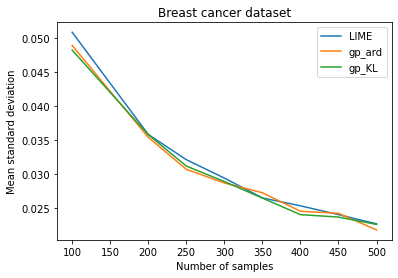

In [21]:
plt.plot(num_samples_list[1:],mean_std_lime,label="LIME")
plt.plot(num_samples_list[1:],mean_std_gp_ard,label="gp_ard")
plt.plot(num_samples_list[1:],mean_std_gp_KL,label="gp_KL")
plt.legend()
plt.xlabel("Number of samples")
plt.ylabel("Mean standard deviation")
plt.title("Breast cancer dataset")
plt.savefig("MSD_breast_cancer.png", dpi=600)

In [22]:
mean_div_std_lime = []
mean_div_std_gp_ard = []
mean_div_std_gp_KL = []

for val in dict_lime:
    if val!=50:
        mean_div_std_lime.append((np.mean(np.std(np.abs(list(dict_lime[val].values())),axis=1)))/np.mean(np.mean(np.abs(list(dict_lime[val].values())),axis=1)))
        mean_div_std_gp_ard.append((np.mean(np.std(np.abs(list(dict_lime[val].values())),axis=1)))/np.mean(np.mean(np.abs(list(dict_gp_ard[val].values())),axis=1)))
        mean_div_std_gp_KL.append((np.mean(np.std(np.abs(list(dict_lime[val].values())),axis=1)))/np.mean(np.mean(np.abs(list(dict_gp_KL[val].values())),axis=1)))

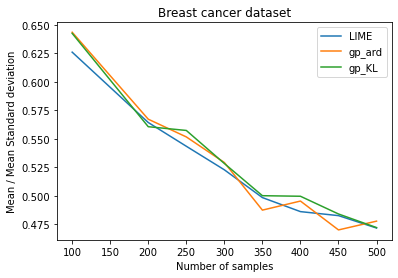

In [23]:
plt.plot(num_samples_list[1:],mean_div_std_lime,label="LIME")
plt.plot(num_samples_list[1:],mean_div_std_gp_ard,label="gp_ard")
plt.plot(num_samples_list[1:],mean_div_std_gp_KL,label="gp_KL")
plt.legend()
plt.xlabel("Number of samples")
plt.ylabel("Mean / Mean Standard deviation")
plt.title("Breast cancer dataset")
plt.savefig("Stability_breast_cancer.png", dpi=600)

In [24]:
import pickle

data = {}

data['dict_gp_KL'] = dict_gp_KL
data['dict_gp_ard'] = dict_gp_ard
data['dict_lime'] = dict_lime

with open('data_breast_cancer.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)